# Linear models

*Friday, September 20*

### 1. `statsmodels` package

_`statsmodels` is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration._

The online documentation is hosted at [statsmodels.org](https://www.statsmodels.org/stable/index.html)

It covered:

- Linear Regression 
- Generalized Linear Models 
- Generalized Estimating Equations 
- Generalized Additive Models (GAM) 
- Robust Linear Models 
- Linear Mixed Effects Models 
- Regression with Discrete Dependent Variable 
- Generalized Linear Mixed Effects Models 
- ANOVA 
- Time Series analysis `tsa` 
- Time Series Analysis by State Space Methods statespace 
- Vector Autoregressions `tsa.vector_ar` 
- Methods for Survival and Duration Analysis 
- Statistics `stats` 
- Nonparametric Methods nonparametric 
- Generalized Method of Moments `gmm` 
- Contingency tables 
- Multiple Imputation with Chained Equations 
- Multivariate Statistics multivariate 
- Empirical Likelihood emplike 
- Other Models miscmodels 
- Distributions 
- Graphics 
- Input-Output iolib 
- Tools 
- The Datasets Package 
- Sandbox 
- Working with Large Data Sets 
- Optimization

`statsmodels` works smoothly with the `pandas` in a way that DataFrame is the dataset form it supports by default.

Anaconda has installed `statsmodels` module by default.
Before using the functions and classes inside, we need to import the `statsmodels.api` and `statsmodels.formula.api`.

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

import numpy as np

The output of `statsmodels` is similiar to the output of functions in `R`.
We start with the most widely used and elementary statistical methods : ordinary least square.

### 2. OLS

**2.1. How to fit a dataset and see the result**

We use the dataset `Guerry` provided by `statsmodel` which studied the determinants of the number of lottery sold.

In [5]:
import pandas as pd
# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
# list of the variables
dat.head(5)

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


More specifically, we studied the relationship between lottery and the literacy and population (in the log scale).

In [7]:
# Fit regression model (using the natural log of one of the regressors)
model = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat)
results = model.fit()

To see the results, we need an additional step:

In [8]:
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Tue, 27 Aug 2019   Prob (F-statistic):           1.90e-08
Time:                        18:39:14   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

**2.2. When the dataset is not in `DataFrame`**

The dataset above is provided by `statsmodels` package hence in the form it supports. 
However, in many situations, the dataset is not constructed yet. 
In this case, we can use `numpy` arrays.

In [9]:
import numpy as np

import statsmodels.api as sm

# Generate artificial data (2 regressors + constant)
nobs = 100

X = np.random.random((nobs, 2))

X = sm.add_constant(X)

beta = [1, .1, .5]

e = np.random.random(nobs)

y = np.dot(X, beta) + e

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     9.796
Date:                Tue, 27 Aug 2019   Prob (F-statistic):           0.000133
Time:                        18:46:55   Log-Likelihood:                -16.388
No. Observations:                 100   AIC:                             38.78
Df Residuals:                      97   BIC:                             46.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5404      0.075     20.632      0.0

Of course, we can create a dataset and make it supported by `statsmodels`.
Details can be found here: [adding a dataset](https://www.statsmodels.org/stable/dev/dataset_notes.html?highlight=statsmodels%20datasets#adding-a-dataset-an-example)

**2.3. Wald's test**

Besides the fitting, `statsmodels` also supports many statsitical testing methods.
Here, we show how to use _Wald's test_ in `statsmodels`. 

Again, we consider the  dataset `Guerry`.

We want to analyse the effect of _Wealth_ and _Literacy_ on the _Crime_pers_ and test:

> whether the coeffcients of _Wealth_ and _Literacy_ are the same.

In [6]:
formula = 'Crime_pers ~ Wealth + Literacy'
results = smf.ols(formula, dat).fit()
hypotheses = '(Wealth = Literacy)'
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[0.03467668]]), p=0.8527291641569565, df_denom=83, df_num=1>


### 3. Genelized linear model

Generalized linear models in `statsmodels` currently supports estimation using the one-parameter exponential families.

**What is it?**

The statistical model for each observation $i$ is assumed to be

 $Y_i \sim F_{EDM}(\cdot|\theta,\phi,w_i)$ and
 $\mu_i = E[Y_i|x_i] = g^{-1}(x_i^\prime\beta)$.

where $g$ is the link function and $F_{EDM}(\cdot|\theta,\phi,w)$
is a distribution of the family of exponential dispersion models (EDM) with
natural parameter $\theta$, scale parameter $\phi$ and weight
:math:`w`.
Its density is given by

 $$f_{EDM}(y|\theta,\phi,w) = c(y,\phi,w)
 \exp\left(\frac{y\theta-b(\theta)}{\phi}w\right)\,.$$

It follows that $\mu = b'(\theta)$ and
$Var[Y|x]=\frac{\phi}{w}b''(\theta)$. The inverse of the first equation
gives the natural parameter as a function of the expected value
$\theta(\mu)$ such that

 $$Var[Y_i|x_i] = \frac{\phi}{w_i} v(\mu_i)$$

with $v(\mu) = b''(\theta(\mu))$. Therefore it is said that a GLM is
determined by link function $g$ and variance function $v(\mu)$
alone (and $x$ of course).

Note that while $\phi$ is the same for every observation $y_i$
and therefore does not influence the estimation of $\beta$,
the weights $w_i$ might be different for every $y_i$ such that the
estimation of $\beta$ depends on them.

**Examples: binomial response $B(n,p)$**

$\mu=E[Y|x] = np$                    
$v(\mu) = \mu-\frac{\mu^2}{n}$             
$ \theta(\mu) = \log\frac{p}{1-p}$                 
$b(\theta) = n\log(1+e^\theta)$

**Real  data**

Here we use the Star98 dataset which was taken with permission from Jeff Gill (2000) _Generalized linear models: A unified approach_

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pandas as pd

star98 = sm.datasets.star98.load(as_pandas=True)
star98.data.head(5)

,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,...,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF
0,452.0,355.0,34.39730,23.299300,14.235280,11.411120,15.91837,14.70646,59.15732,4.445207,...,0.0,22.222220,234.102872,941.68811,869.9948,96.50656,253.52242,1238.1955,13848.8985,5504.0352
1,144.0,40.0,17.36507,29.328380,8.234897,9.314884,13.63636,16.08324,59.50397,5.267598,...,0.0,0.000000,219.316851,811.41756,957.0166,107.68435,340.40609,1321.0664,13050.2233,6958.8468
2,337.0,234.0,32.64324,9.226386,42.406310,13.543720,28.83436,14.59559,60.56992,5.482922,...,0.0,0.000000,420.854496,1746.49488,884.0537,103.92435,295.75929,1022.4252,25491.1232,5605.8777
3,395.0,178.0,11.90953,13.883090,3.796973,11.443110,11.11111,14.38939,58.33411,4.165093,...,0.0,7.142857,159.882095,648.15671,839.3923,90.11341,204.34375,1061.4545,9326.5797,4421.0568
4,8.0,57.0,36.88889,12.187500,76.875000,7.604167,43.58974,13.90568,63.15364,4.324902,...,0.0,0.000000,606.144976,2752.85075,878.1943,81.22097,226.54248,983.7059,38280.2616,4254.4314


In [25]:
print(sm.datasets.star98.NOTE)

::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income students
        PERASIAN - Percentage of Asian student
        PERBLACK - Percentage of black students
        PERHISP  - Percentage of Hispanic students
        PERMINTE - Percentage of minority teachers
        AVYRSEXP - Sum of teachers' years in educational service divided by the
                number of teachers.
        AVSALK   - Total salary budget including benefits divided by the number
                   of full-time teachers (in thousands)
        PERSPENK - Per-pupil spending (in thousands)
        PTRATIO  - Pupil-teacher ratio.
        PCTAF    - Percenta

Now, we use genelized linear model to analyze the number of students above the national median for the math section

In [27]:
data = sm.datasets.star98.load(as_pandas=False)
data.exog = sm.add_constant(data.exog, prepend=False)
glm_binom = sm.GLM(data.endog, data.exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                  303
Model:                            GLM   Df Residuals:                      282
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2998.6
Date:                Fri, 30 Aug 2019   Deviance:                       4078.8
Time:                        00:34:55   Pearson chi2:                 4.05e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0168      0.000    -38.749      0.0

Also, we can see the fit plot of the glm model

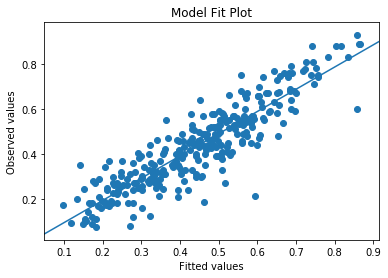

In [32]:
nobs = res.nobs
y = data.endog[:,0]/data.endog.sum(1)
yhat = res.mu

from statsmodels.graphics.api import abline_plot

from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

### 4. Two-stage least square

**4.1. Endogeneity**

Endogeneity issues are at the central of the quantitative research in the social science.
That is to say, when we use the linear regression, the dependent variable might actually affect the explaintionary variable.
And once this happens, the estimates from the OLS could be largely biased.

For example, there is a two-way relationship between the institutions and the economic outcomes:

- better institutions will output labor force of higher quality which boost the economic development
- richer countries/cities can afford better institutions

To eliminate such endogeneity, two-stage least square method is one tool used by many social scientists.
The idea is to find an _instrument variable_ that is

- correlated with the explaintionary variable
- not correlated with the dependent variable

**4.2. Real data: Acemoglu et al. (2001)**

As an example, we will use the data set from Daron Acemoglu, Simon Johnson, and James A Robinson. _The colonial origins of comparative development: an empirical investigation_. The American Economic Review, 91(5):1369–1401, 2001.

In this paper, Acemoglu et al. (2001) want to study the effect of the institution quality on the economic outcomes.

The data set could be downloaded from [Quant Econ](https://lectures.quantecon.org/)

In [3]:
import pandas as pd

# Import and select the data
df4 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable4.dta')
df4 = df4[df4['baseco'] == 1]

df4.head(5)

,shortnam,africa,lat_abst,rich4,avexpr,logpgp95,logem4,asia,loghjypl,baseco
1,AGO,1.0,0.136667,0.0,5.363636,7.770645,5.634789,0.0,-3.411248,1.0
3,ARG,0.0,0.377778,0.0,6.386364,9.133459,4.232656,0.0,-0.872274,1.0
5,AUS,0.0,0.300000,1.0,9.318182,9.897972,2.145931,0.0,-0.170788,1.0
11,BFA,1.0,0.144444,0.0,4.454545,6.845880,5.634789,0.0,-3.540459,1.0
12,BGD,0.0,0.266667,0.0,5.136364,6.877296,4.268438,1.0,-2.063568,1.0


Acemoglu et al. (2001) use:

* economic outcome: _logpgp95_ , log GDP per capita in 1995, adjusted for exchange rates
* institution quality: _avexpr_ , an index of protection against expropriation on average over 1985-95
* instrument variable: _logem4_ , settler mortality rates


In [5]:
import statsmodels.sandbox.regression.gmm as gmm

model = gmm.IV2SLS(endog=df4['logpgp95'], exog=df4['avexpr'], instrument=df4['logem4'])
result = model.fit()
print(result.summary())

                          IV2SLS Regression Results                           
Dep. Variable:               logpgp95   R-squared:                       0.976
Model:                         IV2SLS   Adj. R-squared:                  0.975
Method:                     Two Stage   F-statistic:                       nan
                        Least Squares   Prob (F-statistic):                nan
Date:                Fri, 30 Aug 2019                                         
Time:                        17:02:35                                         
No. Observations:                  64                                         
Df Residuals:                      63                                         
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avexpr         1.2468      0.026     47.531      0.0

C:\Users\jason\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jason\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\jason\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
